###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

## Why not regularize the bias/intercept term?

#### Auxiliary functions and libraries

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as alg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def show_effect(X,y,count=9, max_reg=10):
    # Builds regularization values
    reg = np.linspace(0,max_reg,count)
    # Generates mesh
    pts = 100
    minimum = X[:,1].min()
    maximum = X[:,1].max()
    std = X[:,1].std()
    mesh = np.linspace(minimum - std,maximum + std,pts).reshape((pts,1))
    mesh = np.concatenate((np.ones((pts,1)),mesh),axis=1)
    # Creates axes    
    s = np.sqrt(count)
    m = int(np.floor(s))
    n = int(np.ceil(s))
    fig, axes = plt.subplots(n,m,)
    fig.set_size_inches(3*n,3.5*m)
    fig.subplots_adjust(hspace=0.5)
    yy = np.concatenate((y, np.zeros((2,1))))
    for i,ax in enumerate(axes.ravel()):
        if i < count:
            # Estimate weights (including regularizing w0) 
            diagonal = reg[i] * np.eye(2)
            XX = np.concatenate((X, diagonal))
            wmap = alg.pinv(XX).dot(yy)
            ax.plot(X[:,1],y,'bo')
            ax.plot(mesh[:,1],np.dot(mesh,wmap),'-r')
            # Estimate weights (not regularizing w0)
            diagonal = np.diag(np.concatenate(([0], reg[i] * np.ones(1))))
            XX = np.concatenate((X, diagonal))
            wmap = alg.pinv(XX).dot(yy)
            ax.plot(mesh[:,1],np.dot(mesh,wmap),'-g')
            ax.set_title('lambda=%.1lf' % reg[i])
        else:
            fig.delaxes(ax)   
    
    data_patch = mpatches.Patch(color='b', label='datapoints')
    w0_reg = mpatches.Patch(color='r', label='w0 regularized')
    w0_unreg = mpatches.Patch(color='g', label='w0 unregularized')
    fig.legend(handles=[data_patch,w0_reg,w0_unreg],loc=9)    

### What happens in Ridge Regression?
Lets first analyze its effect on Ridge Regression. For this lets create a simulated dataset coming from the following line:

\begin{eqnarray}
  y = 10 + 0.5x
\tag{1}\end{eqnarray}

To add some challenge during training we will add some noise

In [3]:
# Builds dataset
rnd.seed(1)
m = 20
noise = 2
x = np.linspace(0,20,m).reshape((m,1))
X = np.concatenate((np.ones((m,1)),x),axis=1)
rnd.seed(10)
wreal = np.array([10, 0.5]).reshape((2,1))
y = np.dot(X,wreal) + rnd.normal(0,noise,(m,1))

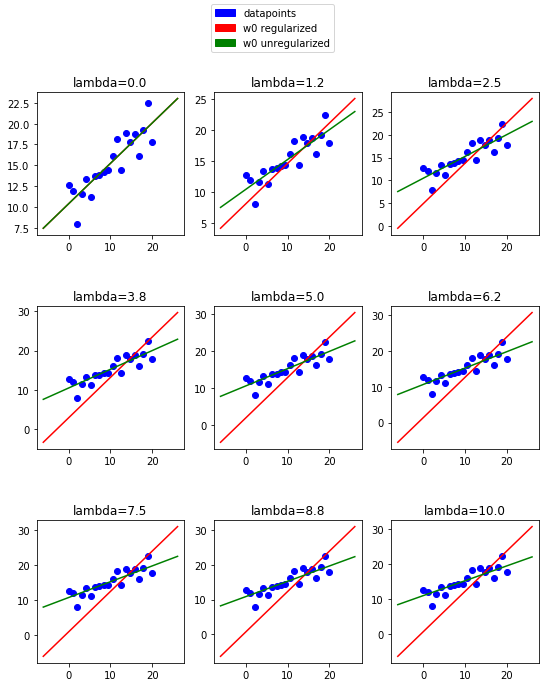

In [4]:
# Shows effect
show_effect(X,y)